In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("house_data.csv")

In [3]:
data

,price,surface,arrondissement
0,1820,46.10,1.0
1,1750,41.00,1.0
2,1900,55.00,1.0
3,1950,46.00,1.0
4,1950,49.00,1.0
...,...,...,...
822,850,35.00,10.0
823,700,10.00,10.0
824,1280,34.00,10.0
825,1545,65.00,10.0


In [4]:
data.isna().sum()

price             0
surface           5
arrondissement    5
dtype: int64

In [5]:
#Nettoyage de la base
data = data.drop(data.loc[data["surface"].isna()].index, axis=0)
data.isna().sum()

price             0
surface           0
arrondissement    0
dtype: int64

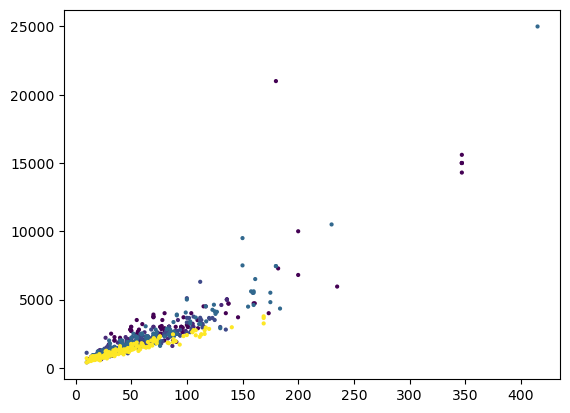

In [6]:
# Affichage graphique
plt.scatter(data["surface"], data["price"], c=data["arrondissement"], s=4)
plt.show()

In [13]:
# On supprime les valeurs abérantes > 10 000€
data = data.loc[data["price"]<10000].reset_index()

In [14]:
data

,index,price,surface,arrondissement
0,0,1820,46.10,1.0
1,1,1750,41.00,1.0
2,2,1900,55.00,1.0
3,3,1950,46.00,1.0
4,4,1950,49.00,1.0
...,...,...,...,...
808,822,850,35.00,10.0
809,823,700,10.00,10.0
810,824,1280,34.00,10.0
811,825,1545,65.00,10.0


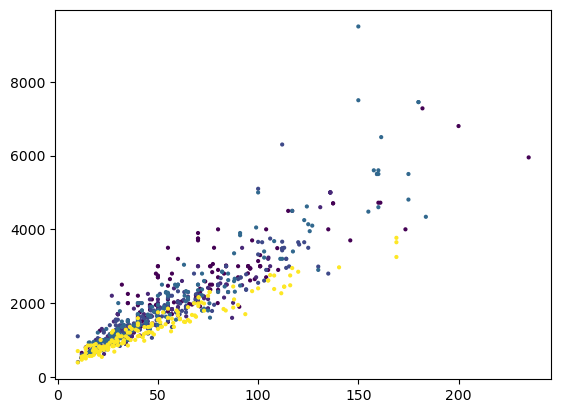

In [9]:
# Affichage graphique
plt.scatter(data["surface"], data["price"], c=data["arrondissement"], s=4)
plt.show()

# Régression linéaire

In [15]:
# On commence par diviser notre dataset en 2 parties (Training Set, Test Set)
x_train, x_test, y_train, y_test = train_test_split(data[["surface","arrondissement"]],data[["price"]], test_size=0.3) 

In [16]:
print(x_train.shape)
print(x_test.shape)

(569, 2)
(244, 2)


In [22]:
lr = linear_model.LinearRegression()
baseline_lr = lr.fit(x_train[["surface"]], y_train)
predict_lr = baseline_lr.predict(x_test[["surface"]])

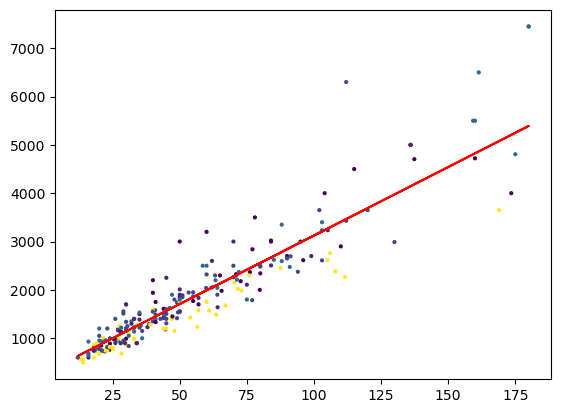

In [42]:
# Affichage graphique
plt.scatter(x_test[["surface"]], y_test[["price"]], c=x_test["arrondissement"], s=4)
plt.plot(x_test[["surface"]], predict_lr, c='red')
plt.show()

In [46]:
def sumsq(x,y):
    return sum((x - y)**2)

def r2score(pred, target):
    return 1 - sumsq(pred, target) / sumsq(target, np.mean(target))

score_bl = r2score(predict_lr[:,0], y_test['price'])

print(score_bl)

0.8532170788373348
